# Analyzing Pond CO2 Emissions

In [1]:
#!pip install pandas --user

## Importing Packages

In [2]:
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 
from sklearn import preprocessing 
from statsmodels.stats.anova import anova_lm
from scipy.integrate import quad

## Reading Data

In [3]:
# imported data
df = pd.read_csv('TotalData.csv') 
# df = pd.read_csv('Pond1Data.csv') 
# df = pd.read_csv('Pond2Data.csv') 
# df = pd.read_csv('Pond3Data.csv') 
# df = pd.read_csv('Pond4Data.csv') 
df.rename(columns={'CO2(ppm)': 'CO2_ppm'}, inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

In [4]:
# check first 5 rows of data
df.head()

,DATE,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY,SENSOR,Unnamed: 8
0,2025-03-30 20:31:00,13.9,21.9,2111,407,25.0,96.0,YELLOW,"POND 1, 11438.79"
1,2025-03-30 20:41:00,10.0,16.3,1563,408,25.2,96.7,YELLOW,NaN
2,2025-03-30 20:51:00,10.1,15.9,1552,407,25.4,96.5,YELLOW,NaN
3,2025-03-30 21:01:00,10.3,17.1,1570,409,25.3,96.6,YELLOW,NaN
4,2025-03-30 21:11:00,7.0,12.3,1269,409,25.3,96.6,YELLOW,NaN


In [5]:
# check shape of data
df.shape

(1189, 9)

In [6]:
# check for nulls
df.isnull().sum()

DATE                   0
PM2.5(ug/m3)           0
PM10(ug/m3)            0
PARTICLES(per/L)       0
CO2_ppm                0
TEMPERATURE            0
HUMIDITY               0
SENSOR                 0
Unnamed: 8          1179
dtype: int64

In [7]:
# check data types
df.dtypes

DATE                datetime64[ns]
PM2.5(ug/m3)               float64
PM10(ug/m3)                float64
PARTICLES(per/L)             int64
CO2_ppm                      int64
TEMPERATURE                float64
HUMIDITY                   float64
SENSOR                      object
Unnamed: 8                  object
dtype: object

In [8]:
# get column names
df.columns

Index(['DATE', 'PM2.5(ug/m3)', 'PM10(ug/m3)', 'PARTICLES(per/L)', 'CO2_ppm',
       'TEMPERATURE', 'HUMIDITY', 'SENSOR', 'Unnamed: 8'],
      dtype='object')

In [9]:
# get basic stats
df.describe()

,DATE,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY
count,1189,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,2025-04-07 10:37:04.945332480,6.260303,10.060219,992.837679,462.793103,23.166863,87.150042
min,2025-03-30 20:31:00,0.900000,1.300000,190.000000,400.000000,11.100000,23.400000
25%,2025-04-05 22:13:00,3.200000,5.200000,541.000000,403.000000,17.000000,77.600000
50%,2025-04-08 04:35:00,5.300000,8.500000,853.000000,431.000000,23.000000,96.800000
75%,2025-04-10 09:18:00,8.600000,13.700000,1354.000000,501.000000,27.200000,99.900000
max,2025-04-12 11:36:00,69.800000,76.000000,10572.000000,692.000000,49.800000,99.900000
std,NaN,4.292530,6.490621,645.711027,76.482977,7.993777,17.180233


## Linear Regression

In [10]:
# create new data frame for analysis
dfA = df.drop(columns=['DATE', 'SENSOR', 'Unnamed: 8'])

In [11]:
# check first 5 rows
dfA.head()

,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY
0,13.9,21.9,2111,407,25.0,96.0
1,10.0,16.3,1563,408,25.2,96.7
2,10.1,15.9,1552,407,25.4,96.5
3,10.3,17.1,1570,409,25.3,96.6
4,7.0,12.3,1269,409,25.3,96.6


In [12]:
# check new shape
dfA.shape

(1189, 6)

In [13]:
# check for nulls
dfA.isnull().sum()

PM2.5(ug/m3)        0
PM10(ug/m3)         0
PARTICLES(per/L)    0
CO2_ppm             0
TEMPERATURE         0
HUMIDITY            0
dtype: int64

In [14]:
# select target value (y) and independent variables (x)
y = df['CO2_ppm']
x = df[['TEMPERATURE', 'HUMIDITY']]

In [15]:
# divide data for training/testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [16]:
# check shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((951, 2), (238, 2), (951,), (238,))

In [17]:
# check selected 5 rows of IVs
x_train.head()

,TEMPERATURE,HUMIDITY
391,23.7,75.2
1165,18.5,99.9
970,20.5,99.9
380,26.6,71.2
906,24.7,87.3


In [18]:
# check same selected rows of target
y_train.head()

391     401
1165    619
970     443
380     401
906     404
Name: CO2_ppm, dtype: int64

In [19]:
# perform linear regression
model = LinearRegression()

In [20]:
# fit x and y values together
model.fit(x_train,y_train)

LinearRegression()

In [21]:
# y-intercept
model.intercept_

np.float64(363.02134727992404)

In [22]:
# model coefficients (aka beta values) - written as [temperature, humidity]
model.coef_

array([-0.41242824,  1.26959712])

In [23]:
# model is used to predict y_test data
y_pred = model.predict(x_test)

In [24]:
# predictions are listed
y_pred

array([479.07527084, 480.57446404, 399.23911118, 475.47745141,
       444.13209079, 479.79085037, 464.81929808, 479.74960755,
       483.0490335 , 407.65417391, 484.16258976, 451.69227449,
       458.29417951, 480.24299488, 478.58435147, 483.13151915,
       479.95582167, 484.9049606 , 443.22075413, 421.53003082,
       479.87333602, 482.14169136, 475.48068264, 475.09980351,
       438.96798542, 482.34790549, 477.16441269, 484.78123212,
       469.20149446, 458.78586216, 455.89486994, 457.099079  ,
       399.14217402, 482.59536243, 482.33498053, 484.08010411,
       483.41375644, 480.96351033, 481.23434923, 476.32739452,
       482.8840622 , 454.98676452, 436.90261297, 482.22417701,
       433.56535355, 480.04400652, 484.78123212, 401.7638539 ,
       442.20108192, 484.36880388, 427.61916108, 435.32986456,
       416.71031957, 402.89679759, 483.91513281, 479.74960755,
       462.45970477, 482.34790549, 446.28641137, 475.01085538,
       481.06937793, 475.94651539, 480.06909315, 479.84

In [25]:
# variance between y_test and y_pred values are averaged
mean_absolute_error(y_test, y_pred)

50.99917142786003

In [26]:
# average percentage of variance from actual value. Meaning, (actual - predicted)/actual
mean_absolute_percentage_error(y_test, y_pred)

0.10888392313705197

In [27]:
# another error test, but all numbers are squared so larger variance has a more significant impact.
mean_squared_error(y_test, y_pred)

3922.890668636548

In [28]:
#R squared explains what percentage of the variance can be explained by the IVs. In this case, IVs only explain 9.5% of variance in data
model.score(x_test, y_test)

0.0947014119163605

## Statistical Significance

In [29]:
# This cell determines which IV contributes more to accurate predictions. 2 Models are made using only one IV, and they are fitted to the actual values. Whichever model is more accurate is more 
# Model with Temperature only
X_temp = df[['TEMPERATURE']]
X_temp = sm.add_constant(X_temp)
model_temp = sm.OLS(y, X_temp).fit()

# Model with humidity only
X_hum = df[['HUMIDITY']]
X_hum = sm.add_constant(X_hum)
model_hum = sm.OLS(y, X_hum).fit()

# Full model with Temperature + Humidity
X_full = df[['TEMPERATURE', 'HUMIDITY']]
X_full = sm.add_constant(X_full)
model_full = sm.OLS(y, X_full).fit()

# Compare models using F-test
f_test = anova_lm(model_temp, model_hum, model_full)
print(f_test)

# output explanation:
# df_resid - degrees of freedom for residual, number of observations minus number of parameters.
# ssr - sum of squared residuals, measures total unexplained variability.
# df_diff - change in degrees of freedom, difference in df_resid between the two models.
# ss_diff - change in sum of squared residuals, difference in ssr between the two models.
# F - F-statistic, compares how much adding humidity improves the model.
# Pr(>F) - P-value for the F-test, determines probability that any improvements made by adding the second IV are due to chance. Here 0.79 indicates that there is no significant improvement.

   df_resid           ssr  df_diff        ss_diff         F    Pr(>F)
0    1187.0  6.438616e+06      0.0            NaN       NaN       NaN
1    1187.0  6.272187e+06     -0.0  166428.470917      -inf       NaN
2    1186.0  6.271836e+06      1.0     351.751272  0.066516  0.796524


In [30]:
# revise
results = smf.ols('CO2_ppm ~ TEMPERATURE + HUMIDITY', data=dfA).fit()
print(results.summary())
# Omnibus: evaluates whether residuals are normally distributed. If p-value is small, NOT normally distributed
# Jarque-Bera (JB): more specific than Omnibus, checks for asymmetry/skewness and tailedness/kurtosis. If p-value is small, NOT normal
# Durbin-Watson: checks for autocorreltation (correlation between residuals). 0-2 is positive autocorrelation, 2-4 is negative autocorrelation, 2 is no autocorrelation (ideal)
# Condition number: measures collinearity (correlation among predictors). Less than 30 is ideal.

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     64.06
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           3.81e-27
Time:                        20:33:32   Log-Likelihood:                -6782.4
No. Observations:                1189   AIC:                         1.357e+04
Df Residuals:                    1186   BIC:                         1.359e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     349.3234     31.575     11.063      

In [31]:
resultsH = smf.ols('CO2_ppm ~ HUMIDITY', data=dfA).fit()
print(resultsH.summary())
# Omnibus: evaluates whether residuals are normally distributed. If p-value is small, NOT normally distributed
# Jarque-Bera (JB): more specific than Omnibus, checks for asymmetry/skewness and tailedness/kurtosis. If p-value is small, NOT normal
# Durbin-Watson: checks for autocorreltation (correlation between residuals). 0-2 is positive autocorrelation, 2-4 is negative autocorrelation, 2 is no autocorrelation (ideal)
# Condition number: measures collinearity (correlation among predictors). Less than 30 is ideal.

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.76e-28
Time:                        20:33:32   Log-Likelihood:                -6782.4
No. Observations:                1189   AIC:                         1.357e+04
Df Residuals:                    1187   BIC:                         1.358e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    341.6814     10.904     31.335      0.0

In [32]:
resultsT = smf.ols('CO2_ppm ~ TEMPERATURE', data=dfA).fit()
print(resultsT.summary())

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     94.16
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           1.78e-21
Time:                        20:33:32   Log-Likelihood:                -6798.0
No. Observations:                1189   AIC:                         1.360e+04
Df Residuals:                    1187   BIC:                         1.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     522.8851      6.551     79.822      

## Graphing

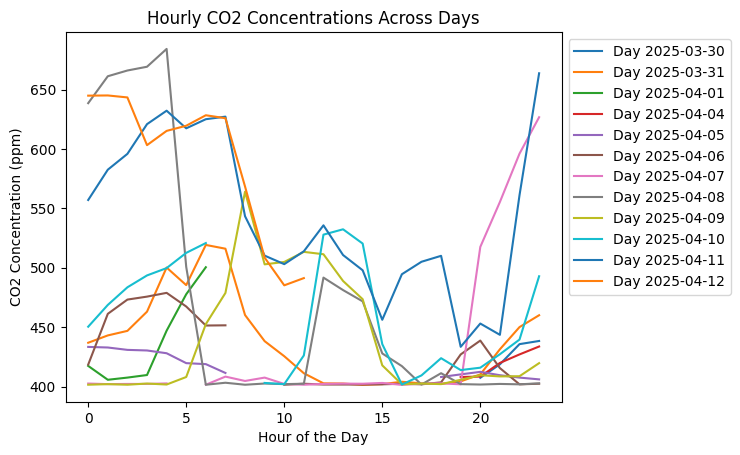

In [33]:
# create new data frame for graphing
dfG = df.drop(columns=['PM2.5(ug/m3)', 'PM10(ug/m3)', 'PARTICLES(per/L)', 'TEMPERATURE', 'HUMIDITY', 'SENSOR', 'Unnamed: 8'])
# format DATE column
dfG['DATE'] = pd.to_datetime(dfG['DATE'])
# Extract the date (e.g., 01/01/2025)
df['DAY'] = df['DATE'].dt.date  
# Extract the hour (0, 1, ..., 23)
df['HOUR'] = df['DATE'].dt.hour  
# Create a pivot table where rows are days and columns are hours
co2_pivot = df.pivot_table(index='DAY', columns='HOUR', values='CO2_ppm', aggfunc='mean')

# Plot CO2 concentration for each day
for day, co2_values in co2_pivot.iterrows():
    co2_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Hourly CO2 Concentrations Across Days")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

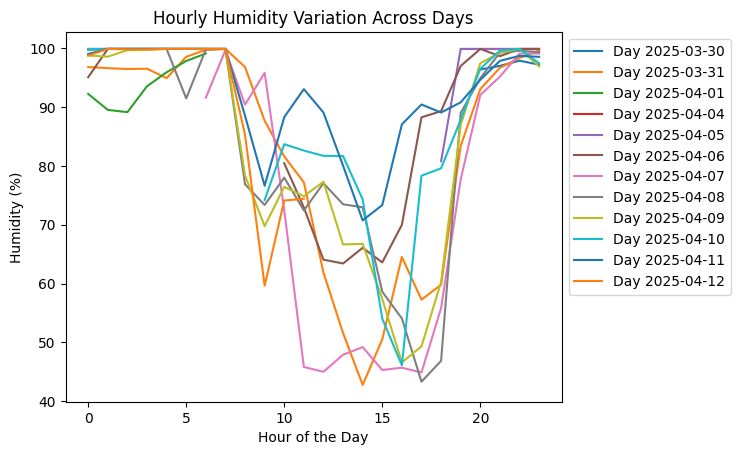

In [34]:
# Create a pivot table for Humidity
humidity_pivot = df.pivot_table(index='DAY', columns='HOUR', values='HUMIDITY', aggfunc='mean')

# Plot Humidity for each day
for day, humidity_values in humidity_pivot.iterrows():
    humidity_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("Humidity (%)")
plt.title("Hourly Humidity Variation Across Days")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

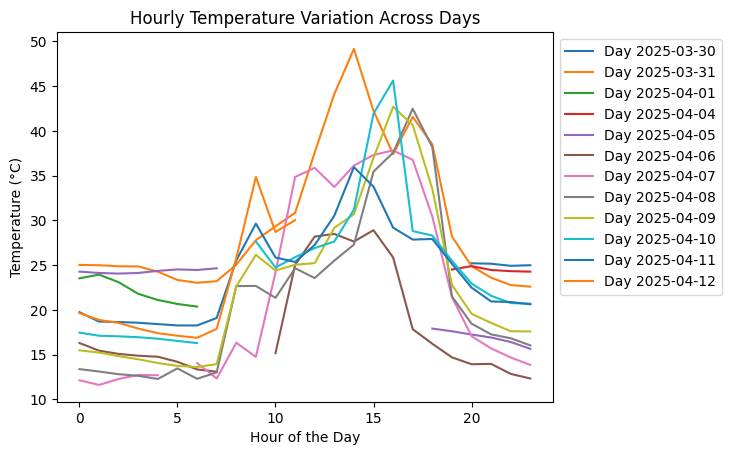

In [35]:
# Create a pivot table for Temperature
temperature_pivot = df.pivot_table(index='DAY', columns='HOUR', values='TEMPERATURE', aggfunc='mean')

# Plot Temperature for each day
for day, temperature_values in temperature_pivot.iterrows():
    temperature_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("Temperature (°C)")
plt.title("Hourly Temperature Variation Across Days")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

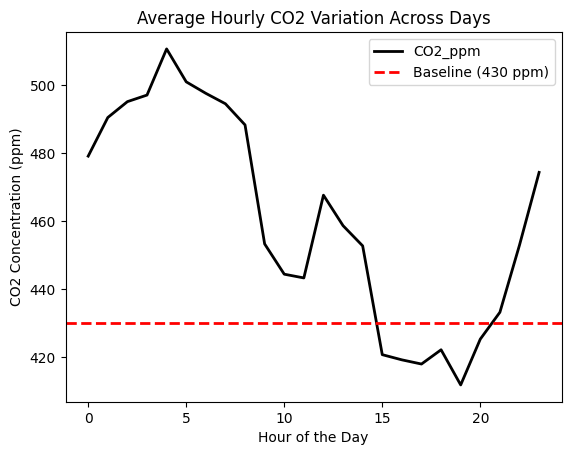

In [36]:
import matplotlib.pyplot as plt

# Compute the average CO2 concentration per hour
avg_co2_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='CO2_ppm', aggfunc='mean')

# Plot the averaged CO2 data
avg_co2_per_hour.plot(label="Average CO2 Variation", color='black', linewidth=2)

# Add baseline at 430 ppm
plt.axhline(y=430, color='red', linestyle='dashed', linewidth=2, label="Baseline (430 ppm)")

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Average Hourly CO2 Variation Across Days")
plt.legend(loc="best")

# Show the plot
plt.show()

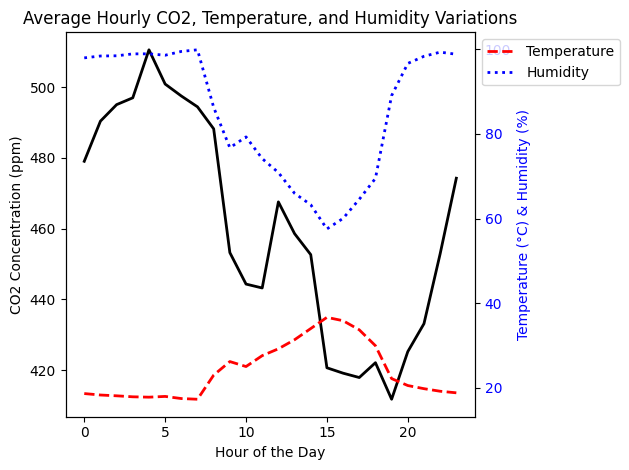

In [37]:
# Compute the average value per hour across all days for each variable
avg_co2_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='CO2_ppm', aggfunc='mean')
avg_temp_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='TEMPERATURE', aggfunc='mean')
avg_humidity_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='HUMIDITY', aggfunc='mean')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot CO2 concentration
ax1.plot(avg_co2_per_hour, label="CO2 Concentration", color='black', linewidth=2)
ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("CO2 Concentration (ppm)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create secondary y-axis for Temperature and Humidity
ax2 = ax1.twinx()
ax2.plot(avg_temp_per_hour, label="Temperature", color='red', linestyle="dashed", linewidth=2)
ax2.plot(avg_humidity_per_hour, label="Humidity", color='blue', linestyle="dotted", linewidth=2)
ax2.set_ylabel("Temperature (°C) & Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Combine legend entries from both axes
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add title and layout adjustments
plt.title("Average Hourly CO2, Temperature, and Humidity Variations")
plt.tight_layout()  # Adjusts layout to fit legend and labels properly

# Show the plot
plt.show()

In [51]:
dfB = df.drop(columns=['PM2.5(ug/m3)', 'PM10(ug/m3)', 'PARTICLES(per/L)', 'TEMPERATURE', 'HUMIDITY'])

dfB = pd.DataFrame(dfB)
dfB['DATE'] = pd.to_datetime(df['DATE'])
# Extract the hour (0-23) from the datetime column
dfB['Hour'] = dfB['DATE'].dt.hour

x = df['DATE']
y = df['CO2_ppm']
model = LinearRegression()
model.fit(x, y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [49]:
# calculating net CO2

# Define your CO2 function (replace with your actual data/function)
def co2_function(x):
    # Example: a sinusoidal curve
    return model.predict(np.array([[x]]))[0]

# Define integration bounds (replace with your actual bounds)
lower_bound = 0  # Start of the graph
upper_bound = 24 * np.pi  # End of the graph

# Integrate the positive and negative areas separately
area_above, _ = quad(lambda x: max(co2_function(x), 430), lower_bound, upper_bound)
area_below, _ = quad(lambda x: min(co2_function(x), 430), lower_bound, upper_bound)

# Calculate net CO2
net_co2 = area_above + area_below  # Add because `area_below` is negative

print(f"Net CO2: {net_co2}")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.